# Estudo do geopandas para análise de dados geoespaciais (aula 03)

* 1.Criando um DataFrame e tratando os dados de latitude e longitude.

In [1]:
import geopandas as gpd
import pandas as pd
import shapely
import matplotlib.pyplot as plt

In [2]:
# Lendo os dados com pandas:
filename = "Belem_Roubo_Celular_Geoespacial_Com_Geometria.xlsx"

df_roubos =pd.read_excel(filename)

In [3]:
# Visualizando o DataFrame:
display(df_roubos)

,LATITUDE,LONGITUDE,MUNICÍPIO(S),DISTRITO,Geometry
0,-1.458083,-48.477782,BELEM,BELEM,POINT (-48.477782 -1.4580827)
1,-1.428949,-48.469100,BELEM,BELEM,POINT (-48.4690999 -1.4289493)
2,-1.426321,-48.474694,BELEM,BELEM,POINT (-48.4746944 -1.4263208)
3,-1.473010,-48.485103,BELEM,BELEM,POINT (-48.4851025 -1.4730102)
4,-1.431615,-48.455285,BELEM,BELEM,POINT (-48.4552853 -1.4316152)
...,...,...,...,...,...
37859,-1.475268,-48.489943,BELEM,BELEM,POINT (-48.48994349999998 -1.4752682)
37860,-1.321257,-48.440846,BELEM,ICOARACI,POINT (-48.4408458 -1.3212574)
37861,-1.426372,-48.471170,BELEM,BELEM,POINT (-48.471170400000005 -1.4263724)
37862,-1.427453,-48.452407,BELEM,BELEM,POINT (-48.452407300000004 -1.4274526)


In [4]:
# Verificando se a valores nulos:
df_roubos.isnull().sum()

LATITUDE        2
LONGITUDE       2
MUNICÍPIO(S)    0
DISTRITO        0
Geometry        0
dtype: int64

In [5]:
# Tratando valores nulos:
df_roubos = df_roubos.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [6]:
# Verificando se os valores nulos realmente foram retirados:
df_roubos.isnull().sum()

LATITUDE        0
LONGITUDE       0
MUNICÍPIO(S)    0
DISTRITO        0
Geometry        0
dtype: int64

* 2.Criando o GeoDataFrame:

In [7]:
from shapely.geometry import Point

In [ ]:
# Vamos transformar as colunas de coordenadas em objetos do tipo point: 
df_roubos["LATITUDE"] = pd.to_numeric(df_roubos["LATITUDE"], errors="coerce")
df_roubos["LONGITUDE"] = pd.to_numeric(df_roubos["LONGITUDE"], errors="coerce")

# Vamos criar a coluna 'Geometry' como objetos Point
df_roubos["Geometry"] = df_roubos.apply(lambda row: Point(row["LONGITUDE"], row["LATITUDE"]), axis=1)


In [ ]:
# Criando o GeoDataFrame:
gdf_roubos = gpd.GeoDataFrame(df_roubos, geometry="Geometry", crs="EPSG:4326")

In [ ]:
# Vamos ver se o tipo da nossa variavel está no formato correto:
type(gdf_roubos)

geopandas.geodataframe.GeoDataFrame

<Axes: >

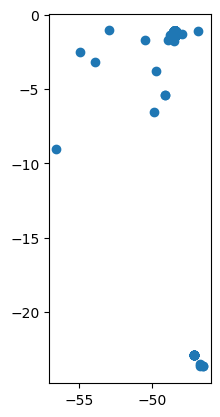

In [ ]:
# vamos plotar os pontos das nossas coordenadas:
gdf_roubos.plot()

In [ ]:
# Vamos salvar os dados de Belém:
gdf_capital_PA = gpd.read_file("PA_Municipios_2022.geojson", driver='GeoJSON')

/home/lasedi1780/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: driver GeoJSON does not support open option DRIVER
  return ogr_read(


<Axes: >

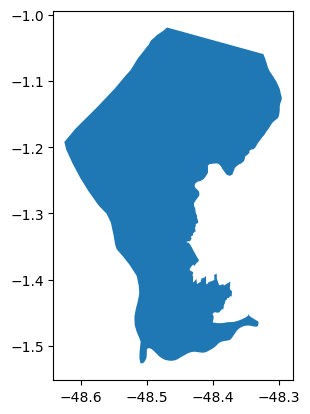

In [ ]:
# Vamos plotar o mapa de Belém: 
gdf_capital_PA.plot()

<Axes: >

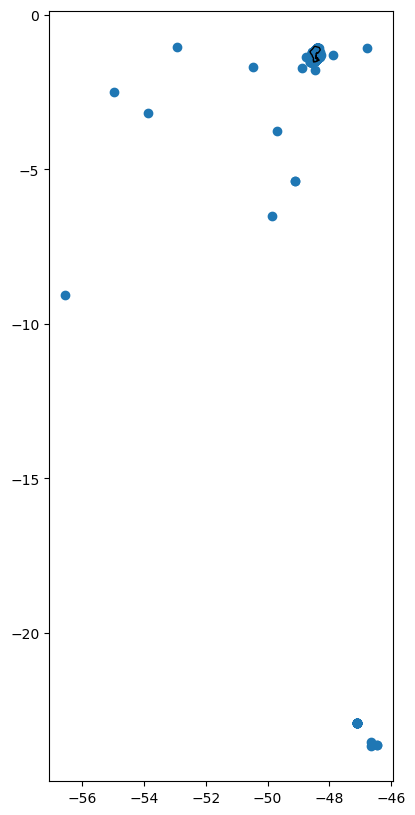

In [21]:
# Vamos mostrar os dados ultilizando o matplotlib:
fig, ax = plt.subplots(figsize=(10,10))

gdf_roubos.plot(ax=ax)
gdf_capital_PA.plot(ax=ax,facecolor='None', edgecolor='black')

* Vamos filtrar os dados registrados em Belém:

In [22]:
# Vamos pegar o polygon de Belém:
polygon_Belém = gdf_capital_PA.iloc[0].geometry

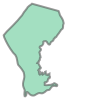

In [23]:
polygon_Belém

In [24]:
gdf_roubos.intersects(polygon_Belém)

0        True
1        True
2        True
3        True
4        True
         ... 
37859    True
37860    True
37861    True
37862    True
37863    True
Length: 37862, dtype: bool

In [25]:
gdf_roubos_capital = gdf_roubos[gdf_roubos.intersects(polygon_Belém)]

<Axes: >

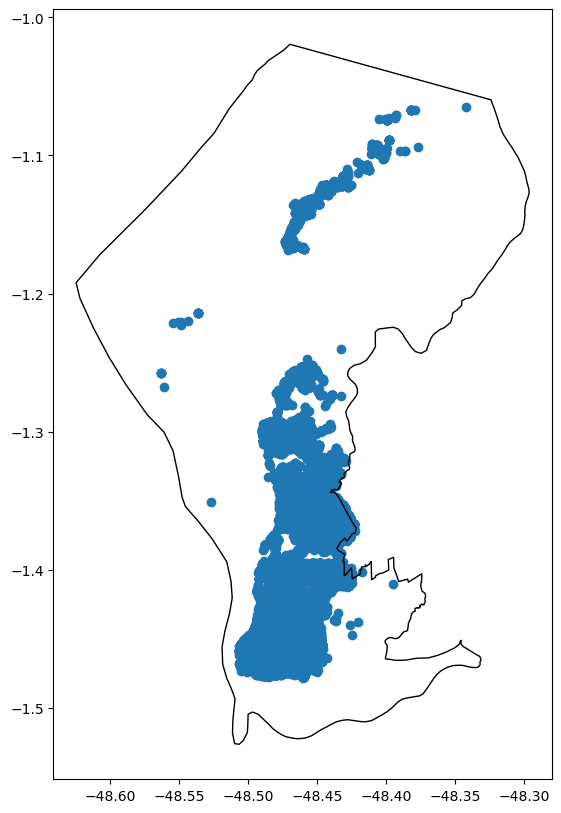

In [26]:
# Vamos mostrar os dados com matplotlib: 
fig, ax = plt.subplots(figsize=(10,10))

gdf_roubos_capital.plot(ax=ax)
gdf_capital_PA.plot(ax=ax,facecolor='None', edgecolor='black')

In [28]:
# Salvando os dados de roubo em Belém:
filename = "/home/lasedi1780/Estudos_geopandas/gdf_roubos_capital"

gdf_roubos_capital.to_file(filename, driver='GeoJSON')